In [5]:
import pandas as pd
import numpy as np
from numpy import random
import math
import scipy.stats as stats
import statistics

import matplotlib.pyplot as plt
import seaborn as sns

In [38]:
asteroids = pd.read_csv(r'/Users/manele/Downloads/neo.csv')
asteroids

,id,name,est_diameter_min,est_diameter_max,relative_velocity,miss_distance,orbiting_body,sentry_object,absolute_magnitude,hazardous
0,2162635,162635 (2000 SS164),1.198271,2.679415,13569.249224,5.483974e+07,Earth,False,16.73,False
1,2277475,277475 (2005 WK4),0.265800,0.594347,73588.726663,6.143813e+07,Earth,False,20.00,True
2,2512244,512244 (2015 YE18),0.722030,1.614507,114258.692129,4.979872e+07,Earth,False,17.83,False
3,3596030,(2012 BV13),0.096506,0.215794,24764.303138,2.543497e+07,Earth,False,22.20,False
4,3667127,(2014 GE35),0.255009,0.570217,42737.733765,4.627557e+07,Earth,False,20.09,True
...,...,...,...,...,...,...,...,...,...,...
90831,3763337,(2016 VX1),0.026580,0.059435,52078.886692,1.230039e+07,Earth,False,25.00,False
90832,3837603,(2019 AD3),0.016771,0.037501,46114.605073,5.432121e+07,Earth,False,26.00,False
90833,54017201,(2020 JP3),0.031956,0.071456,7566.807732,2.840077e+07,Earth,False,24.60,False
90834,54115824,(2021 CN5),0.007321,0.016370,69199.154484,6.869206e+07,Earth,False,27.80,False


In [39]:
asteroids = pd.DataFrame(asteroids)
asteroids

,id,name,est_diameter_min,est_diameter_max,relative_velocity,miss_distance,orbiting_body,sentry_object,absolute_magnitude,hazardous
0,2162635,162635 (2000 SS164),1.198271,2.679415,13569.249224,5.483974e+07,Earth,False,16.73,False
1,2277475,277475 (2005 WK4),0.265800,0.594347,73588.726663,6.143813e+07,Earth,False,20.00,True
2,2512244,512244 (2015 YE18),0.722030,1.614507,114258.692129,4.979872e+07,Earth,False,17.83,False
3,3596030,(2012 BV13),0.096506,0.215794,24764.303138,2.543497e+07,Earth,False,22.20,False
4,3667127,(2014 GE35),0.255009,0.570217,42737.733765,4.627557e+07,Earth,False,20.09,True
...,...,...,...,...,...,...,...,...,...,...
90831,3763337,(2016 VX1),0.026580,0.059435,52078.886692,1.230039e+07,Earth,False,25.00,False
90832,3837603,(2019 AD3),0.016771,0.037501,46114.605073,5.432121e+07,Earth,False,26.00,False
90833,54017201,(2020 JP3),0.031956,0.071456,7566.807732,2.840077e+07,Earth,False,24.60,False
90834,54115824,(2021 CN5),0.007321,0.016370,69199.154484,6.869206e+07,Earth,False,27.80,False


In [40]:
asteroids.isnull().sum()

id                    0
name                  0
est_diameter_min      0
est_diameter_max      0
relative_velocity     0
miss_distance         0
orbiting_body         0
sentry_object         0
absolute_magnitude    0
hazardous             0
dtype: int64

36418    84.730541
12709    51.527608
37651    51.527608
56533    51.527608
16895    19.321462
Name: est_diameter_max, dtype: float64

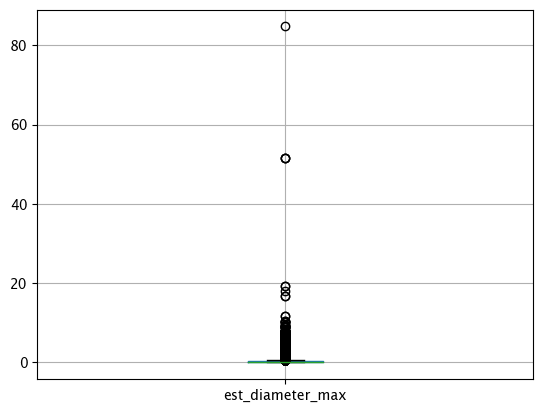

In [41]:
asteroids.boxplot(column=['est_diameter_max'])
asteroids['est_diameter_max'].nlargest(5)

In [42]:
mean_diameter = asteroids[['est_diameter_min', 'est_diameter_max']].mean(axis=1)
asteroids['mean_diameter'] = asteroids[['est_diameter_min', 'est_diameter_max']].mean(axis=1)

In [43]:
asteroids


,id,name,est_diameter_min,est_diameter_max,relative_velocity,miss_distance,orbiting_body,sentry_object,absolute_magnitude,hazardous,mean_diameter
0,2162635,162635 (2000 SS164),1.198271,2.679415,13569.249224,5.483974e+07,Earth,False,16.73,False,1.938843
1,2277475,277475 (2005 WK4),0.265800,0.594347,73588.726663,6.143813e+07,Earth,False,20.00,True,0.430073
2,2512244,512244 (2015 YE18),0.722030,1.614507,114258.692129,4.979872e+07,Earth,False,17.83,False,1.168268
3,3596030,(2012 BV13),0.096506,0.215794,24764.303138,2.543497e+07,Earth,False,22.20,False,0.156150
4,3667127,(2014 GE35),0.255009,0.570217,42737.733765,4.627557e+07,Earth,False,20.09,True,0.412613
...,...,...,...,...,...,...,...,...,...,...,...
90831,3763337,(2016 VX1),0.026580,0.059435,52078.886692,1.230039e+07,Earth,False,25.00,False,0.043007
90832,3837603,(2019 AD3),0.016771,0.037501,46114.605073,5.432121e+07,Earth,False,26.00,False,0.027136
90833,54017201,(2020 JP3),0.031956,0.071456,7566.807732,2.840077e+07,Earth,False,24.60,False,0.051706
90834,54115824,(2021 CN5),0.007321,0.016370,69199.154484,6.869206e+07,Earth,False,27.80,False,0.011845


In [44]:
asteroids_mean_velocity = asteroids.groupby(['name']).agg({'relative_velocity' :'mean'})
asteroids_mean_velocity

,relative_velocity
name,
(1983 LC),60192.646491
(1986 NA),51810.077045
(1988 NE),22815.738845
(1989 AZ),55184.046572
(1991 GO),92501.896829
...,...
9950 ESA (1990 VB),29511.503126
99799 (2002 LJ3),28970.538534
99907 (1989 VA),79729.216475


In [45]:
velocity_avg = asteroids.groupby('name', as_index=False).agg({'relative_velocity':'mean'})
velocity_avg.columns = ['name', 'velocity_avg']
asteroids = pd.merge(asteroids, velocity_avg, on='name')
asteroids=asteroids.drop(columns=['relative_velocity'])
asteroids

,id,name,est_diameter_min,est_diameter_max,miss_distance,orbiting_body,sentry_object,absolute_magnitude,hazardous,mean_diameter,velocity_avg
0,2162635,162635 (2000 SS164),1.198271,2.679415,5.483974e+07,Earth,False,16.73,False,1.938843,13569.249224
1,2277475,277475 (2005 WK4),0.265800,0.594347,6.143813e+07,Earth,False,20.00,True,0.430073,37187.969051
2,2277475,277475 (2005 WK4),0.265800,0.594347,4.524364e+07,Earth,False,20.00,True,0.430073,37187.969051
3,2277475,277475 (2005 WK4),0.265800,0.594347,2.916569e+07,Earth,False,20.00,True,0.430073,37187.969051
4,2277475,277475 (2005 WK4),0.265800,0.594347,1.413990e+07,Earth,False,20.00,True,0.430073,37187.969051
...,...,...,...,...,...,...,...,...,...,...,...
90831,3779523,(2017 OL68),0.176423,0.394494,4.064435e+07,Earth,False,20.89,False,0.285458,4649.668900
90832,54272756,(2022 GA4),0.232571,0.520044,3.376447e+07,Earth,False,20.29,False,0.376307,34153.422552
90833,54225015,(2021 WR3),0.310853,0.695088,6.254685e+07,Earth,False,19.66,False,0.502971,103342.744852
90834,3735178,(2015 VK142),0.350393,0.783502,6.344693e+07,Earth,False,19.40,False,0.566947,65388.349843


In [46]:
miss_distance_avg = asteroids.groupby('name', as_index=False).agg({'miss_distance':'mean'})
miss_distance_avg.columns = ['name', 'miss_distance_avg']
asteroids = pd.merge(asteroids, miss_distance_avg, on='name')
asteroids = asteroids.drop(columns=['miss_distance'])
asteroids
asteroids_cleaned = asteroids.drop_duplicates(subset=['name'])

In [48]:
asteroids_cleaned

,id,name,est_diameter_min,est_diameter_max,orbiting_body,sentry_object,absolute_magnitude,hazardous,mean_diameter,velocity_avg,miss_distance_avg
0,2162635,162635 (2000 SS164),1.198271,2.679415,Earth,False,16.73,False,1.938843,13569.249224,5.483974e+07
1,2277475,277475 (2005 WK4),0.265800,0.594347,Earth,False,20.00,True,0.430073,37187.969051,3.504758e+07
25,2512244,512244 (2015 YE18),0.722030,1.614507,Earth,False,17.83,False,1.168268,95258.903671,4.794386e+07
32,3596030,(2012 BV13),0.096506,0.215794,Earth,False,22.20,False,0.156150,43409.550520,4.313247e+07
39,3667127,(2014 GE35),0.255009,0.570217,Earth,False,20.09,True,0.412613,42580.419393,4.659339e+07
...,...,...,...,...,...,...,...,...,...,...,...
90831,3779523,(2017 OL68),0.176423,0.394494,Earth,False,20.89,False,0.285458,4649.668900,4.064435e+07
90832,54272756,(2022 GA4),0.232571,0.520044,Earth,False,20.29,False,0.376307,34153.422552,3.376447e+07
90833,54225015,(2021 WR3),0.310853,0.695088,Earth,False,19.66,False,0.502971,103342.744852,6.254685e+07
90834,3735178,(2015 VK142),0.350393,0.783502,Earth,False,19.40,False,0.566947,65388.349843,6.344693e+07


In [ ]:
hazardous / mean_diameter / name